# Tabular models

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [0]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [3]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [12]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,HS-grad,Never-married,Machine-op-inspct,Own-child,White,False,-1.5090,0.4016,-0.4224,<50k
Private,HS-grad,Divorced,Other-service,Not-in-family,Black,False,-0.4828,-0.4372,-0.4224,<50k
Private,12th,Never-married,Adm-clerical,Own-child,White,False,-1.4357,0.7877,-0.8135,<50k
Private,9th,Divorced,Priv-house-serv,Not-in-family,Black,False,2.3758,0.3706,-1.9869,<50k
Private,HS-grad,Never-married,Other-service,Own-child,White,False,-1.2158,0.2714,-0.4224,<50k
Local-gov,HS-grad,Never-married,Other-service,Not-in-family,White,False,-0.1896,0.0248,-0.4224,<50k
Private,HS-grad,Married-civ-spouse,Tech-support,Husband,White,False,-0.6294,-1.1798,-0.4224,>=50k
?,HS-grad,Never-married,?,Unmarried,Black,False,-0.3362,-0.4089,-0.4224,<50k
Private,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,False,1.0564,-0.1119,1.1422,>=50k
Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,False,-0.9959,-0.0318,-0.4224,<50k


In [20]:
data

TabularDataBunch;

Train: LabelList (32361 items)
x: TabularList
workclass  Private; education  Assoc-acdm; marital-status  Married-civ-spouse; occupation #na#; relationship  Wife; race  White; education-num_na False; age 0.7632; fnlwgt -0.8381; education-num 0.7511; ,workclass  Private; education  Masters; marital-status  Divorced; occupation  Exec-managerial; relationship  Not-in-family; race  White; education-num_na False; age 0.3968; fnlwgt 0.4458; education-num 1.5334; ,workclass  Private; education  HS-grad; marital-status  Divorced; occupation #na#; relationship  Unmarried; race  Black; education-num_na True; age -0.0430; fnlwgt -0.8868; education-num -0.0312; ,workclass  Self-emp-inc; education  Prof-school; marital-status  Married-civ-spouse; occupation  Prof-specialty; relationship  Husband; race  Asian-Pac-Islander; education-num_na False; age -0.0430; fnlwgt -0.7288; education-num 1.9245; ,workclass  Self-emp-not-inc; education  7th-8th; marital-status  Married-civ-spouse; 

In [28]:
data.test_ds[197]#[0]

(TabularLine workclass  Self-emp-not-inc; education  10th; marital-status  Married-spouse-absent; occupation #na#; relationship  Not-in-family; race  White; education-num_na True; age 2.2292; fnlwgt -0.9220; education-num -0.0312; ,
 EmptyLabel )

In [29]:
data.valid_ds[198]

(TabularLine workclass  ?; education  Assoc-voc; marital-status  Married-civ-spouse; occupation  ?; relationship  Husband; race  White; education-num_na False; age 0.6166; fnlwgt -0.8589; education-num 0.3599; ,
 Category >=50k)

In [31]:
data.valid_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f8420e4fcc0>, device=device(type='cuda'), tfms=[], collate_fn=<function data_collate at 0x7f842aeb3488>)

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [14]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


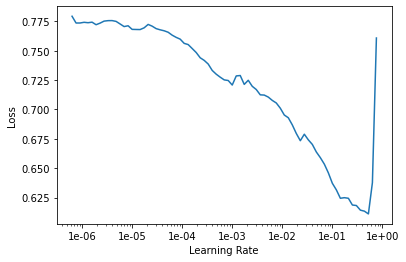

In [15]:
learn.recorder.plot()

In [16]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.365328,0.389725,0.850000,00:04


In [33]:
2e-2

0.02

In [34]:
learn.fit(1, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.371088,0.373960,0.825000,00:04


In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


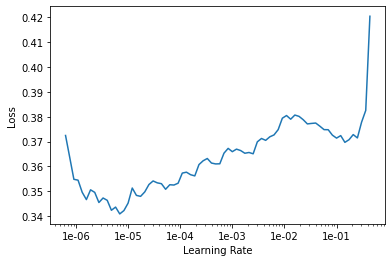

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, slice(1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.364776,0.374080,0.825000,00:04
1,0.357184,0.375241,0.840000,00:04
2,0.360753,0.374620,0.840000,00:04
3,0.368379,0.375320,0.840000,00:04
4,0.360207,0.374230,0.825000,00:04


In [0]:
learn.save('stage-2-5')

## Inference

In [0]:
row = df.iloc[0]

In [18]:
row

age                                49
workclass                     Private
fnlwgt                         101320
education                  Assoc-acdm
education-num                      12
marital-status     Married-civ-spouse
occupation                        NaN
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object

In [23]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,36,Private,297449,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>=50k
32557,23,?,123983,Bachelors,13.0,Never-married,?,Own-child,Other,Male,0,0,40,United-States,<50k
32558,53,Private,157069,Assoc-acdm,12.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>=50k
32559,32,Local-gov,217296,HS-grad,9.0,Married-civ-spouse,Transport-moving,Wife,White,Female,4064,0,22,United-States,<50k


In [0]:
pred = learn.predict(row)

In [22]:
pred

(Category >=50k, tensor(1), tensor([0.4374, 0.5626]))

In [0]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.4402, 0.5598]))